In [83]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as svs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
iris = load_iris()
X = iris.data
Y = iris.target

In [85]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [87]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [89]:
def evaluate_model(name,y_true,y_pred):
    print(f"{name} Performance")
    print("Accuracy Score: ", accuracy_score(y_true,y_pred))
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=iris.target_names,yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} model")
    plt.show()
    
    

Decision Tree-Gini Performance
Accuracy Score:  0.9777777777777777


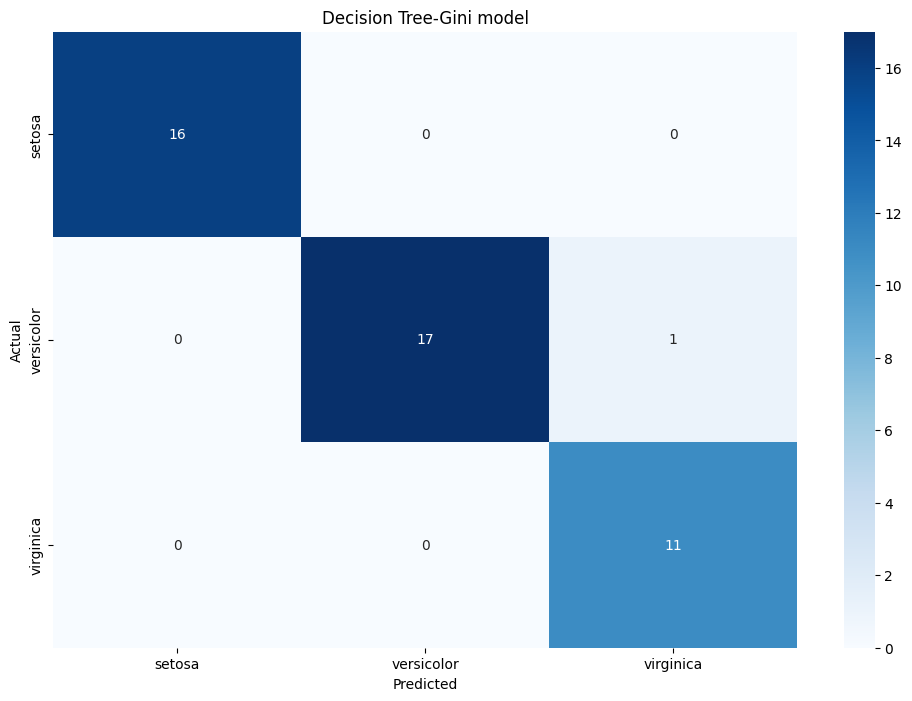

In [90]:
evaluate_model("Decision Tree-Gini",Y_test,y_pred)

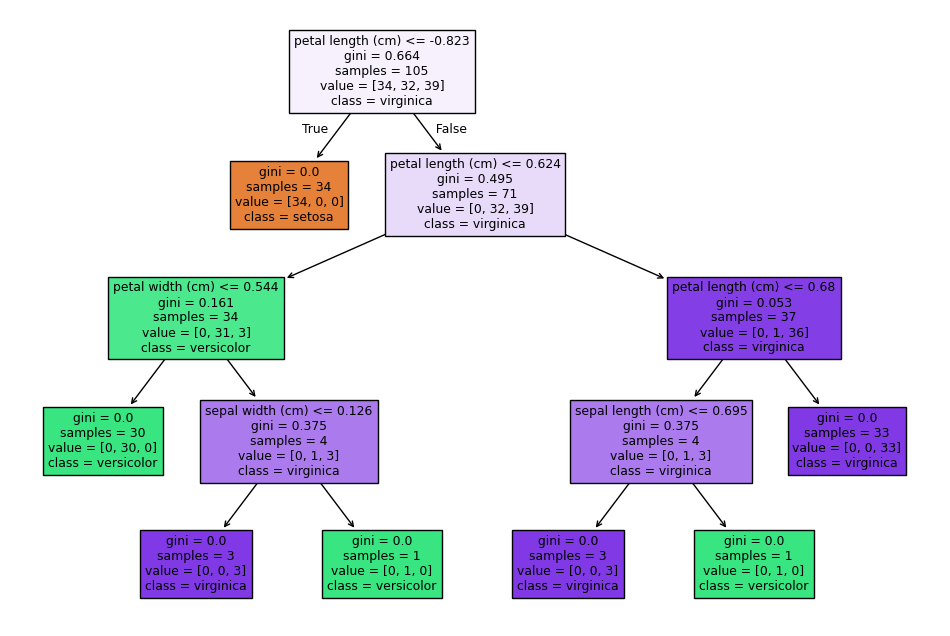

In [91]:
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,class_names=iris.target_names,feature_names=iris.feature_names)
plt.show()

Decision Tree-Entropy Performance
Accuracy Score:  0.9777777777777777


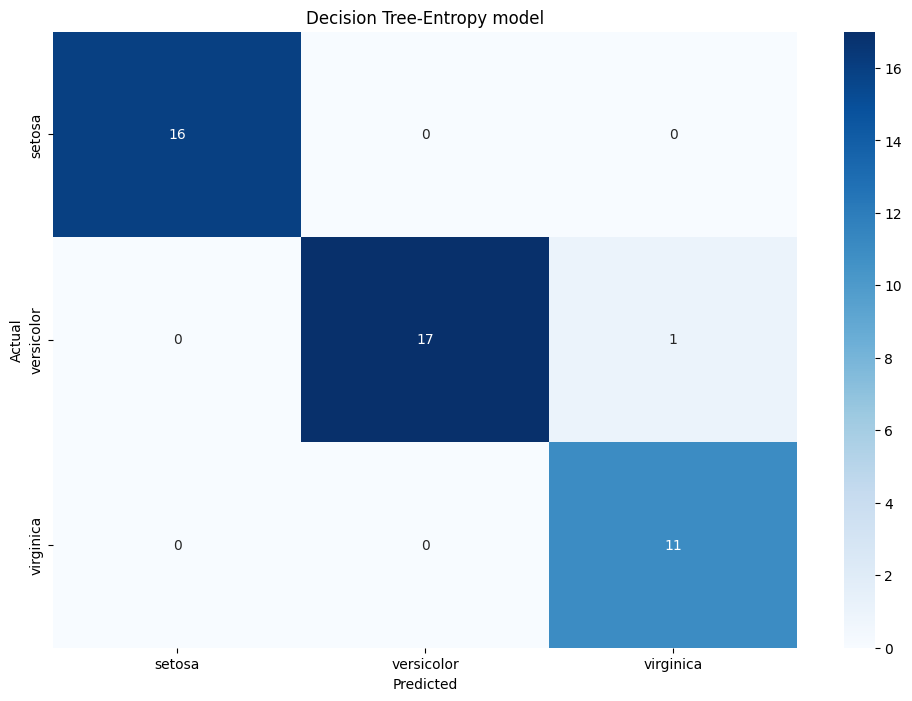

In [92]:
#Out of 16 Setosa, all 16 were correctly classified; out of 18 Versicolor, 17 were correct and 1 misclassified as Virginica; out of 11 Virginica, all 11 were correctly classified
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2)
clf_entropy.fit(X_train,Y_train)
y_pred=clf_entropy.predict(X_test)
evaluate_model("Decision Tree-Entropy",Y_test,y_pred)

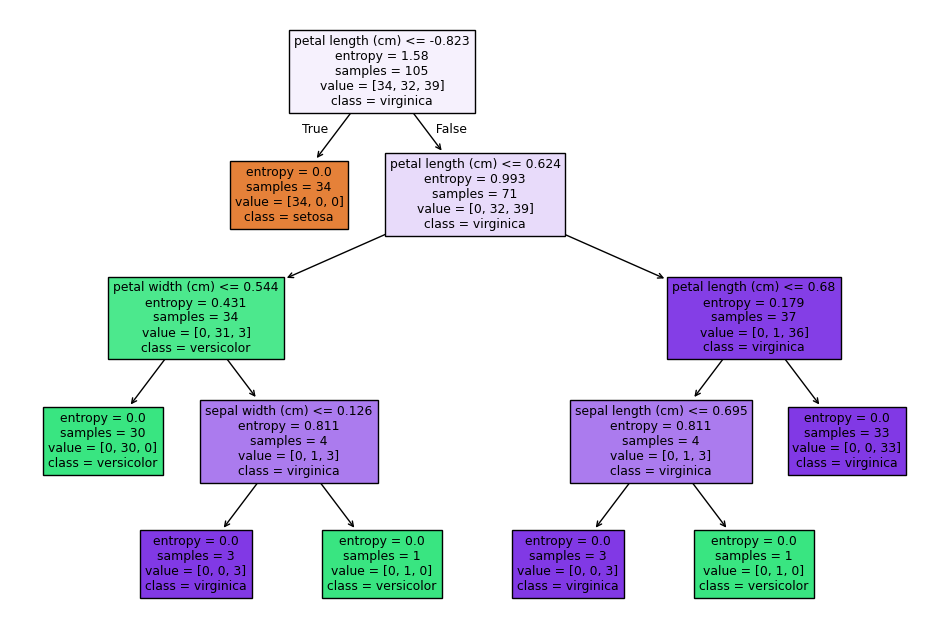

In [93]:
plt.figure(figsize=(12,8))
plot_tree(clf_entropy,class_names=iris.target_names,feature_names=iris.feature_names,filled=True)
plt.show()

Decision Tree-Log Loss Performance
Accuracy Score:  0.9777777777777777


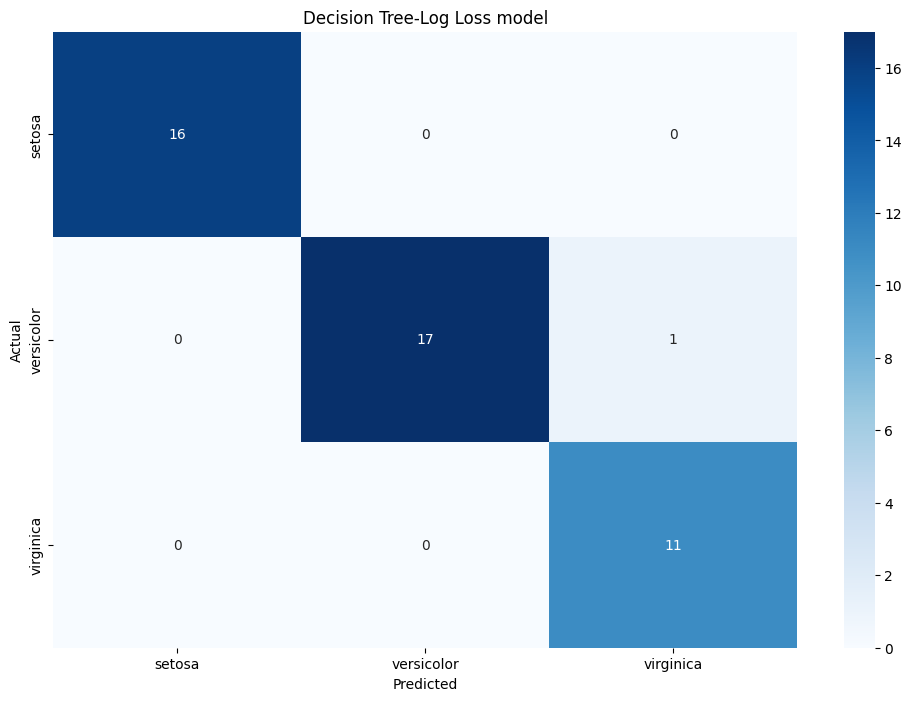

In [94]:
clf_log_loss = DecisionTreeClassifier(criterion='log_loss',max_depth=4,min_samples_split=2)
clf_log_loss.fit(X_train,Y_train)
y_pred=clf_log_loss.predict(X_test)
evaluate_model("Decision Tree-Log Loss",Y_test,y_pred)

In [95]:
from sklearn.linear_model import LogisticRegression

Logistic regression Performance
Accuracy Score:  0.9777777777777777


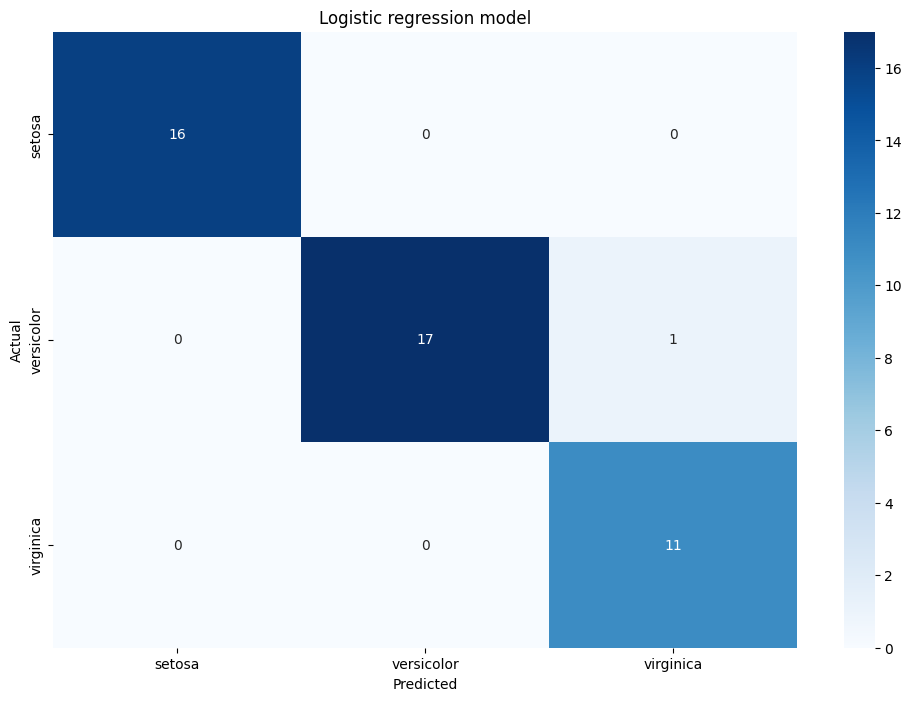

In [96]:
clf_logi = LogisticRegression(max_iter=100)
clf_logi.fit(X_train,Y_train)
y_pred_logi=clf_logi.predict(X_test)
evaluate_model("Logistic regression",Y_test,y_pred_logi)

In [97]:
from sklearn.ensemble import BaggingClassifier

Bagging Classifier Performance
Accuracy Score:  0.9555555555555556


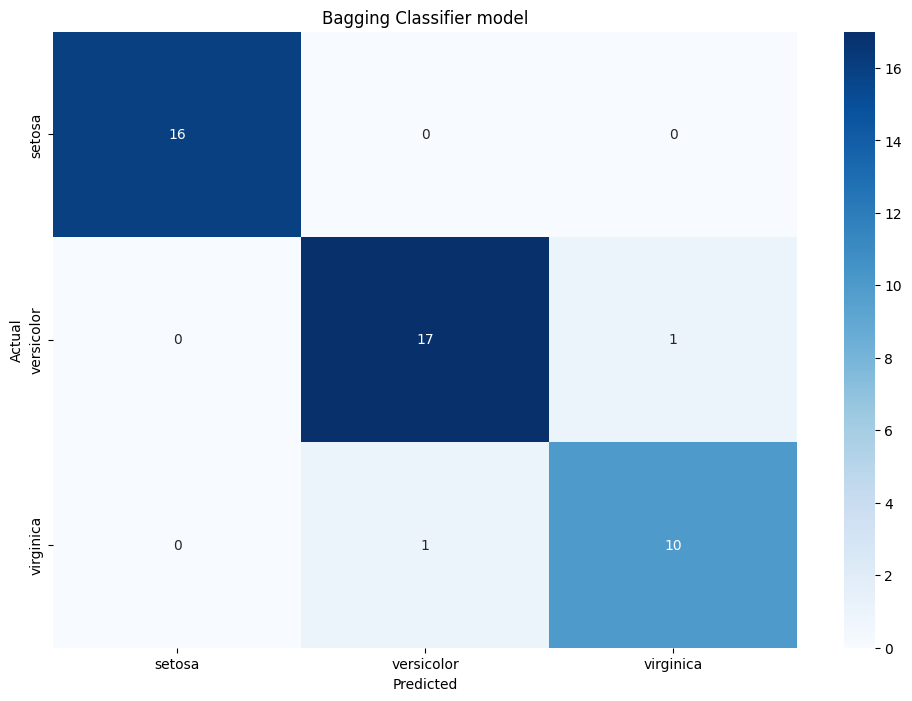

In [98]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=10)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
evaluate_model("Bagging Classifier",Y_test,y_pred)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
clf_random = RandomForestClassifier(n_estimators=100,random_state=0)
clf_random.fit(X_train,Y_train)
y_pred=clf_random.predict(X_test)

Random Forest Classifier Performance
Accuracy Score:  0.9777777777777777


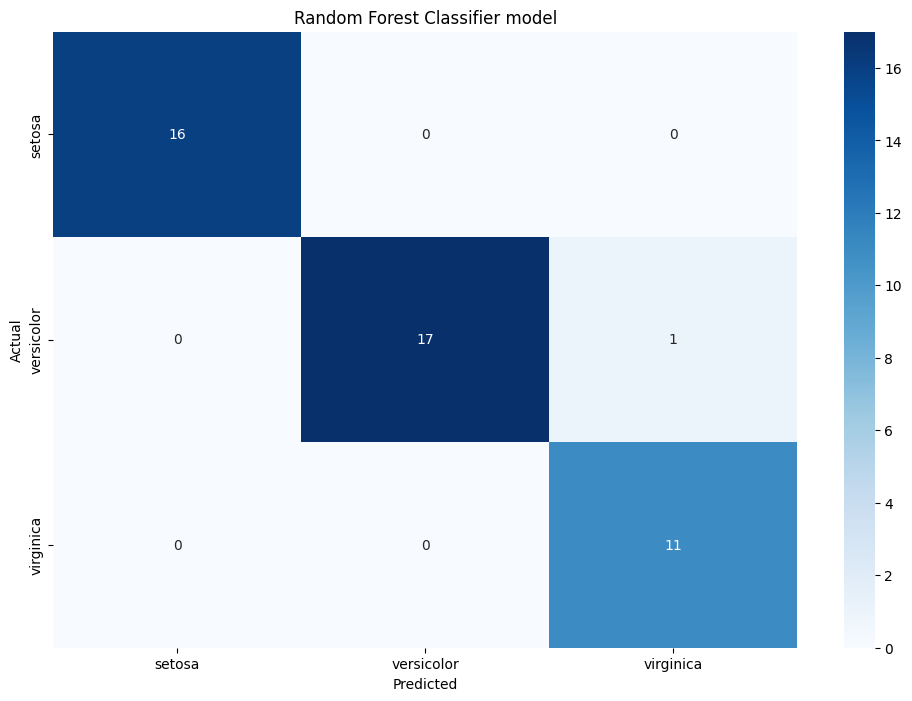

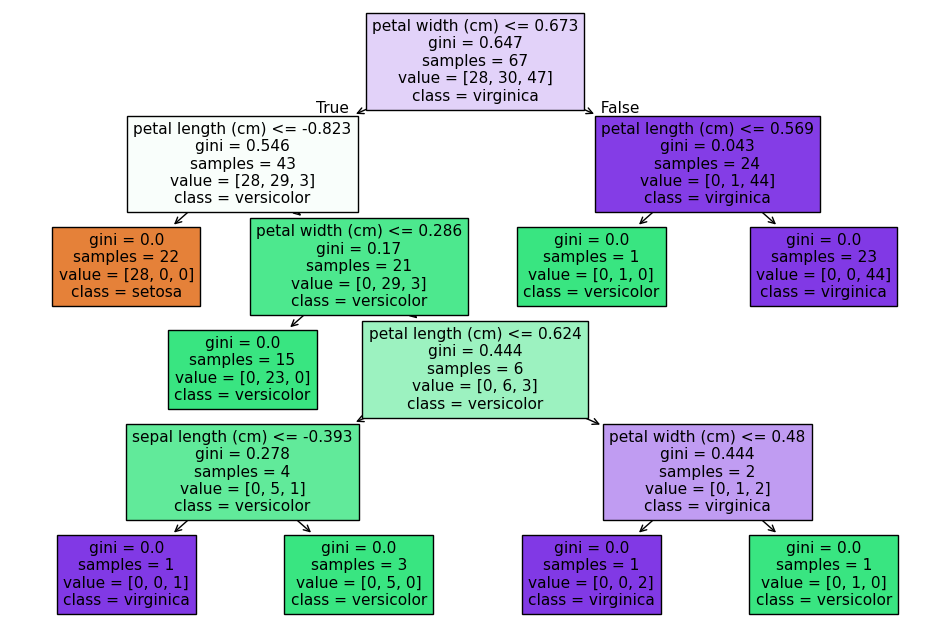

In [114]:
evaluate_model("Random Forest Classifier",Y_test,y_pred)
plt.figure(figsize=(12,8))
plot_tree(clf_random.estimators_[0],class_names=iris.target_names,feature_names=iris.feature_names,filled=True)
plt.show()

Gradient Boosting Classifier Performance
Accuracy Score:  0.9777777777777777


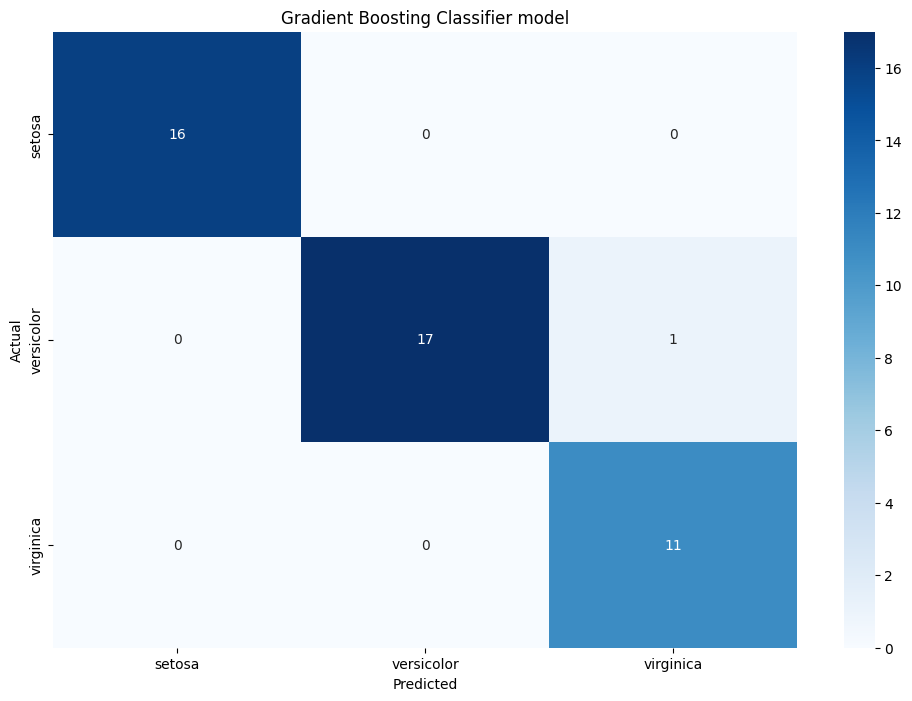

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_grad_boosting = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
clf_grad_boosting .fit(X_train,Y_train)
y_pred_grad_boosting = clf_grad_boosting .predict(X_test)
evaluate_model("Gradient Boosting Classifier",Y_test,y_pred_grad_boosting)

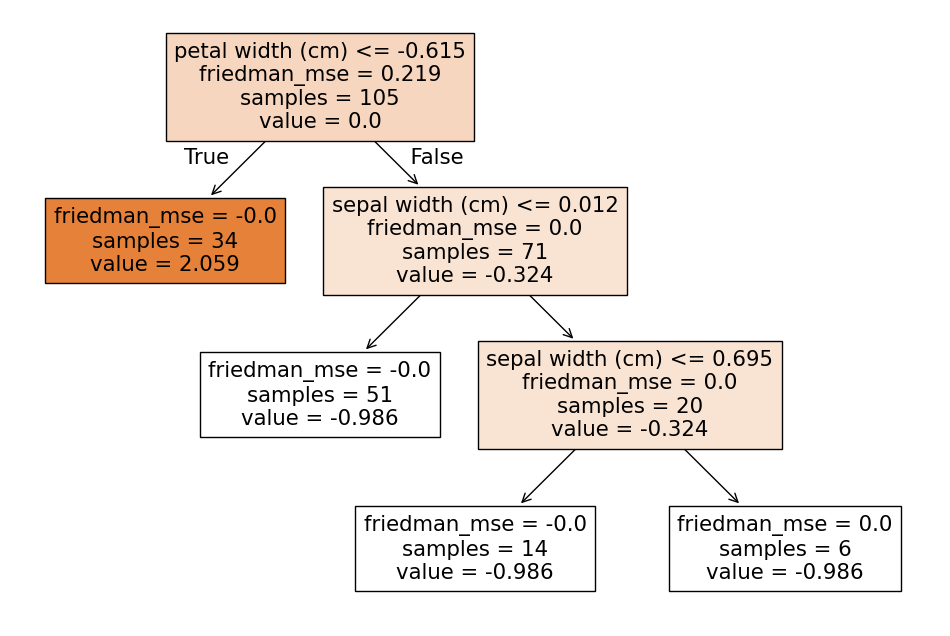

In [116]:
plt.figure(figsize=(12,8))
plot_tree(clf_grad_boosting.estimators_[0][0],class_names=iris.target_names,feature_names=iris.feature_names,filled=True)
plt.show()

In [117]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
